In [1]:
%matplotlib inline

In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt

from skimage import io
import skimage.data as data
import skimage.segmentation as seg
import skimage.feature as feature
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

from skimage import img_as_float

def image_show(image, nrows=1, ncols=1, cmap='gray', **kwargs):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

In [3]:
IMAGES_DIRECTORY = 'images/single-card/gdf1/'

In [4]:
image_files = os.listdir(IMAGES_DIRECTORY)

In [5]:
# filename = os.path.join(IMAGES_DIRECTORY, image_files[0])
filename = os.path.join(IMAGES_DIRECTORY, 'IMG_20180912_190604.jpg')
# filename = os.path.join(IMAGES_DIRECTORY, 'IMG_20180912_190607.jpg')
# filename = 'images/single-card/pdf1/IMG_20180912_190710.jpg'

photo = io.imread(filename)

(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x114a93950>)

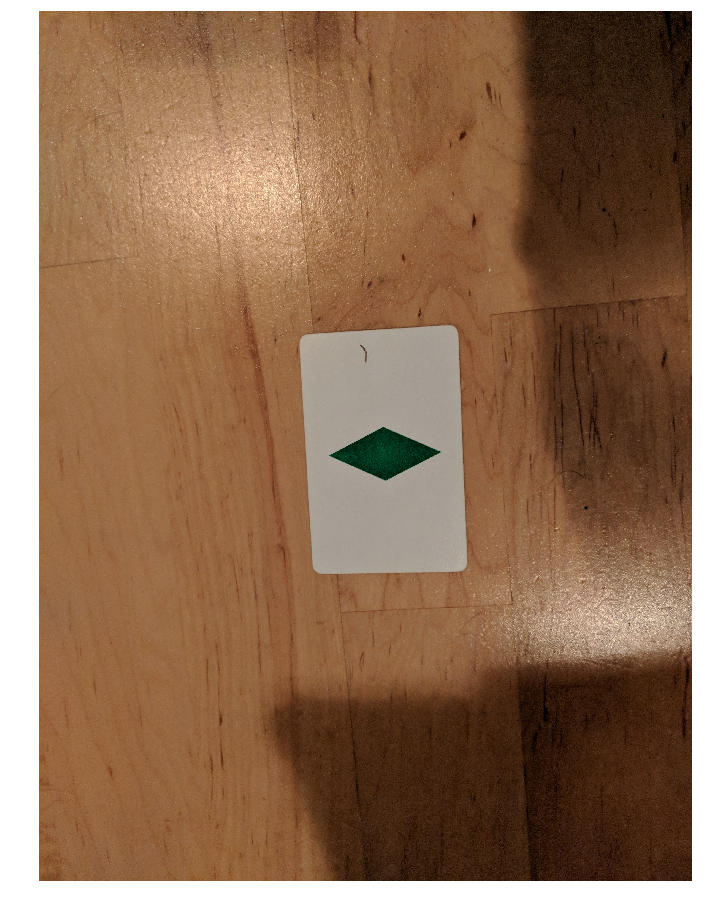

In [6]:
image_show(photo)

In [7]:
# from skimage.transform import rescale, resize, downscale_local_mean

# # consider downsizing if it will improve speed of othe algo steps
# # http://scikit-image.org/docs/dev/auto_examples/transform/plot_rescale.html
# image_resized = resize(photo, (photo.shape[0] / 4, photo.shape[1] / 4),
#                        anti_aliasing=True)

# image_show(image_resized)

In [8]:
# from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
#                                  denoise_wavelet, estimate_sigma)
# photo_denoised = denoise_bilateral(image_resized, sigma_color=0.1, sigma_spatial=15,
#                 multichannel=True)
# image_show(photo_denoised)

(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x114b46dd0>)

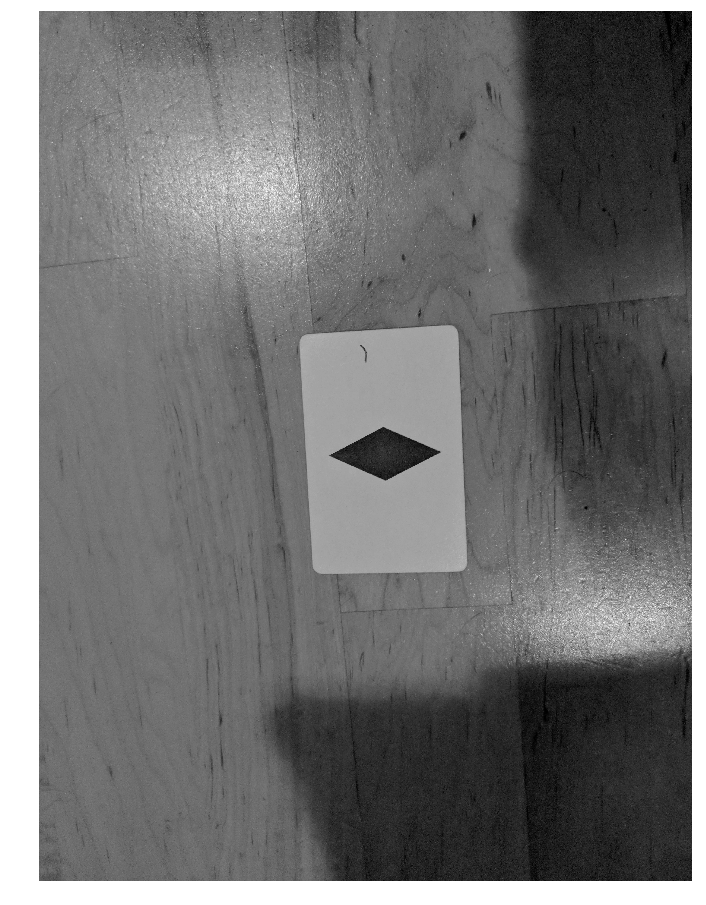

In [9]:
bw_photo = color.rgb2grey(photo)
image_show(bw_photo)

/Users/NathanLeiby/.virtualenvs/em-el/lib/python2.7/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x115010d90>)

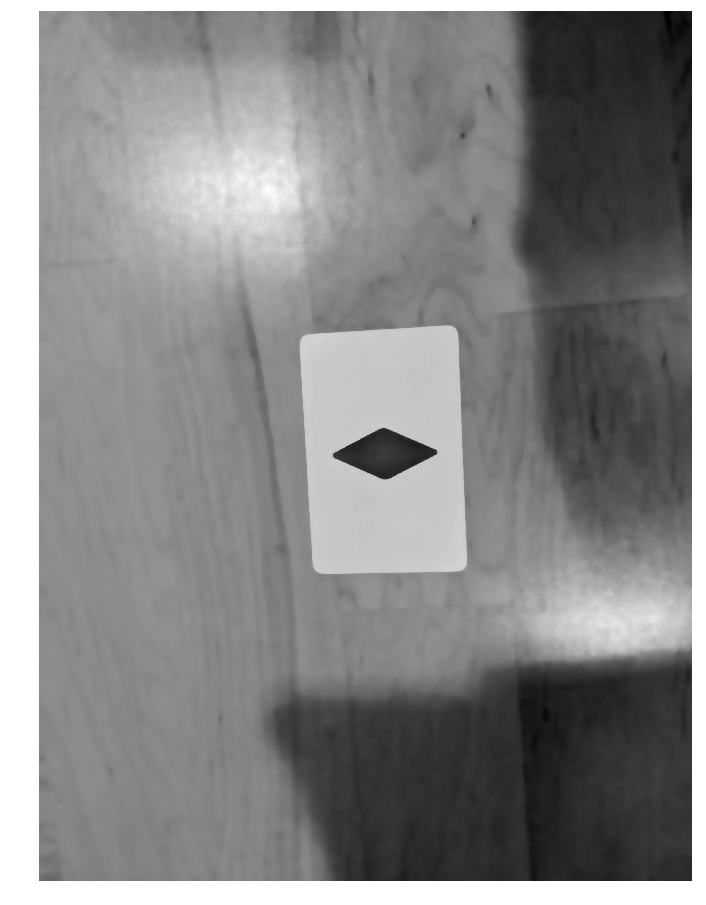

In [10]:
from skimage.filters.rank import median
from skimage.morphology import disk

diskoid = median(bw_photo, disk(20))
image_show(diskoid)

(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x114cc04d0>)

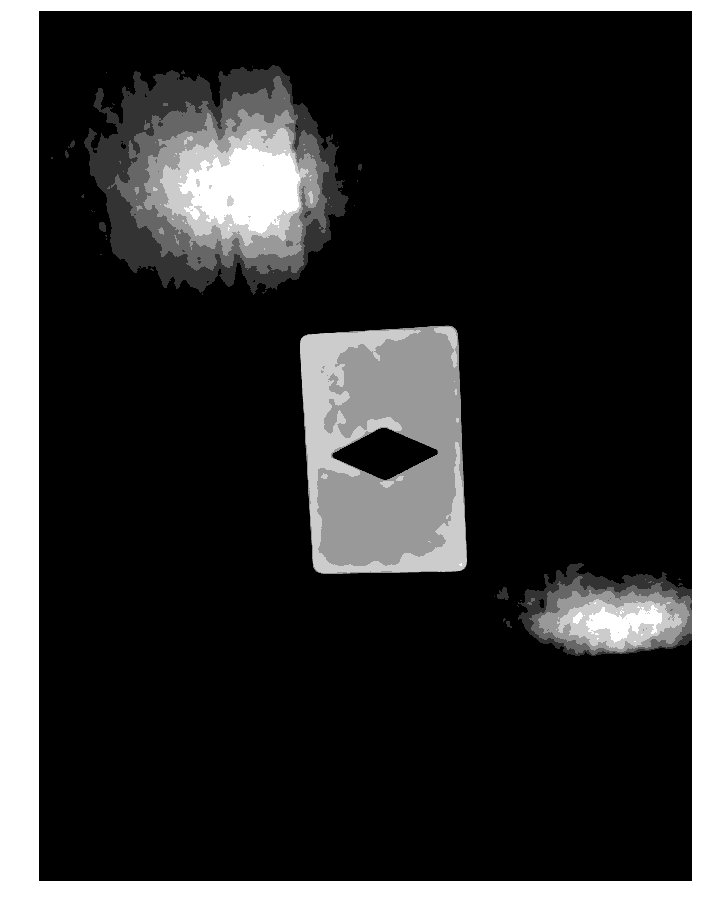

In [11]:
# print(diskoid)
m_diskoid = np.zeros_like(diskoid)
# bw_photo
m_diskoid[diskoid > 130] = 1
m_diskoid[diskoid > 140] = 2
m_diskoid[diskoid > 150] = 3
m_diskoid[diskoid > 160] = 4
m_diskoid[diskoid > 170] = 5
image_show(m_diskoid)

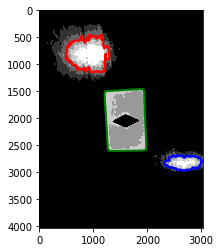

('Number of contours:', 43)
('Number of coordinates per top-3 (contours)', 4049, 3592, 1984)
('Number of coordinates per top-3 (coords)', 1947, 535, 1011)
('Number of coordinates per top-3 (subdiv)', 8097, 7183, 3967)


In [12]:
# http://scikit-image.org/docs/dev/auto_examples/edges/plot_contours.html
# https://stackoverflow.com/questions/39642680/create-mask-from-skimage-contour

import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

# Use the pre-filtered image
r  = m_diskoid

# Find contours
# http://scikit-image.org/docs/0.8.0/api/skimage.measure.find_contours.html
# TODO: Explore other values for magic_number
magic_number1 = 2 # worked OK as 0.9 before
contours = measure.find_contours(r, magic_number1)

# Select the largest contiguous contour
contour1 = sorted(contours, key=lambda x: len(x))[-1]
contour2 = sorted(contours, key=lambda x: len(x))[-2]
contour3 = sorted(contours, key=lambda x: len(x))[-3]

ap_tolerance = .3 # was == 1
coords1 = measure.approximate_polygon(contour1, tolerance=ap_tolerance)
coords2 = measure.approximate_polygon(contour2, tolerance=ap_tolerance)
coords3 = measure.approximate_polygon(contour3, tolerance=ap_tolerance)

subdiv1 = measure.subdivide_polygon(contour1, degree=2, preserve_ends=True)
subdiv2 = measure.subdivide_polygon(contour2, degree=2, preserve_ends=True)
subdiv3 = measure.subdivide_polygon(contour3, degree=2, preserve_ends=True)

# Display the image and plot the contour
fig, ax = plt.subplots()
ax.imshow(r, interpolation='nearest', cmap=plt.cm.gray)
X, Y = ax.get_xlim(), ax.get_ylim()

# ax.step(contour1.T[1], contour1.T[0], linewidth=2, c='r')
ax.step(coords1[:, 1], coords1[:, 0], linewidth=2, c='r')
# ax.step(subdiv1[:, 1], subdiv1[:, 0], linewidth=2, c='r')

# ax.step(contour2.T[1], contour2.T[0], linewidth=2, c='g')
ax.step(coords2[:, 1], coords2[:, 0], linewidth=2, c='g')
# ax.step(subdiv2[:, 1], subdiv2[:, 0], linewidth=2, c='g')

# TODO: Figure out how to draw a bounding rectangle
# rect = cv2.minAreaRect(contour2)
# ax.step(rect[:, 1], rect[:, 0], linewidth=2, c='g')

# ax.step(contour3.T[1], contour3.T[0], linewidth=2, c='b')
ax.step(coords3[:, 1], coords3[:, 0], linewidth=2, c='b')
# ax.step(subdiv3[:, 1], subdiv3[:, 0], linewidth=2, c='g')

ax.set_xlim(X), ax.set_ylim(Y)
plt.show()

print("Number of contours:", len(contours))
print("Number of coordinates per top-3 (contours)", len(contour1), len(contour2), len(contour3))
# TODO: we might be able to estimate rectangle via lowest # of coords
# 'Number of coordinates per top-3 (coords)', 879, 32, 349)
print("Number of coordinates per top-3 (coords)", len(coords1), len(coords2), len(coords3))
print("Number of coordinates per top-3 (subdiv)", len(subdiv1), len(subdiv2), len(subdiv3))

# boundingRect coordinates (TODO)
    # furtherest left pt
    # furtherest up pt
    # furtherest right pt
    # furthest down pt

# minAreaRect (TODO) 



# TODO: Filter for just contours that are rectangles of card dimensions
# TODO: Cut out this part of the image